# Task generation

This page focuses on generating experimenting task to play with recomendation systems.

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from IPython.display import HTML

## `make_blobs`

You can use [sklearn.datasets.make_blobs](#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). Each blob is a group of objects by preference. So suppose we have groups of objects that somehow rate two items. There are only two items to make the visualisation easier. The viasulasation of application such case is in the cell before:

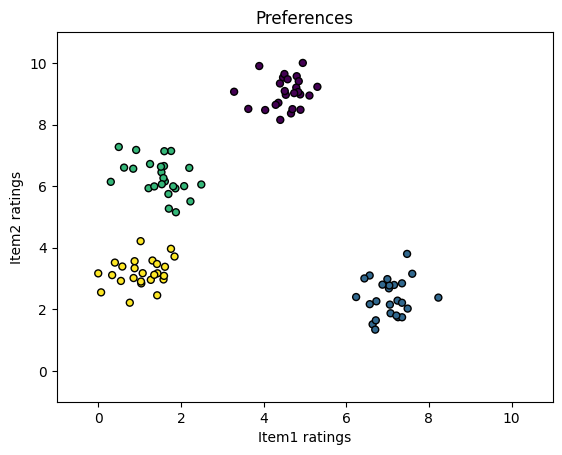

In [36]:
r_width = 10
r_height = 30
n_samples = 100

R, c = make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=4,
    random_state=23
)
# Normalise the observations to 0,10 
# it's just for convenience.
R = (R-R.min())*10/(R.max()-R.min())
plt.scatter(
    R[:, 0], R[:, 1], 
    marker="o", c=c, 
    s=25, edgecolor="k"
)
plt.xlim(-1,11)
plt.ylim(-1,11)

plt.xlabel("Item1 ratings")
plt.ylabel("Item2 ratings")
plt.title("Preferences")

plt.show()

Here are some groups of users. Some of them prefer item1 more. So if we find an object that really prefers item1 (rates it 7 and more), we can assume that it won't like item2. 

Now let's check how it looks on case that is closer to real live. So here we juts have more items that somehow matches to objects. So we came to matrix like that.

In [38]:
r_width = 10
r_height = 30

R, c = make_blobs(
    n_samples=r_height,
    n_features=r_width,
    centers=3,
    random_state=10
)
R = np.round((R-R.min())*10/(R.max()-R.min())).astype(int)
R

array([[ 7,  9,  0,  6,  8,  6,  7,  3,  9,  8],
       [ 6, 10,  1,  4,  9,  6,  7,  3,  8,  7],
       [ 5,  2,  4,  6,  5,  4,  6,  5,  6,  6],
       [ 6,  9,  1,  6,  8,  6,  8,  3,  9,  7],
       [ 5,  2,  4,  7,  4,  5,  6,  5,  7,  6],
       [ 6,  1,  4,  7,  4,  5,  7,  5,  8,  6],
       [ 7,  9,  1,  6,  8,  6,  7,  3,  9,  8],
       [ 5,  2,  4,  6,  5,  5,  6,  5,  6,  6],
       [ 6,  2,  4,  6,  4,  4,  6,  5,  7,  6],
       [ 6,  1,  5,  7,  4,  4,  6,  5,  7,  7],
       [ 7,  9,  1,  5,  8,  7,  7,  3,  8,  6],
       [ 7,  9,  1,  5,  7,  6,  8,  3,  9,  7],
       [ 9,  1,  6,  7,  5,  2,  3,  7,  2,  1],
       [ 6,  2,  4,  6,  6,  4,  7,  5,  7,  6],
       [ 8,  1,  6,  8,  5,  2,  2,  7,  3,  1],
       [ 8,  1,  6,  6,  6,  3,  2,  7,  2,  2],
       [ 7,  1,  7,  7,  5,  2,  3,  7,  2,  1],
       [ 5,  1,  4,  7,  4,  5,  6,  4,  6,  6],
       [ 6,  2,  4,  7,  5,  5,  6,  5,  6,  6],
       [ 7,  1,  6,  7,  6,  3,  1,  7,  2,  0],
       [ 6, 10,  1, 

Here the settings are rounded to make it easier to see with your eyes. It's already possible to find some patterns. But let's have a look at the submatrices, which are divided by blobs:

In [52]:
for v in np.unique(c):
    display(HTML(f"<hr>Blob{v}"))
    print(R[c==v])

[[9 1 6 7 5 2 3 7 2 1]
 [8 1 6 8 5 2 2 7 3 1]
 [8 1 6 6 6 3 2 7 2 2]
 [7 1 7 7 5 2 3 7 2 1]
 [7 1 6 7 6 3 1 7 2 0]
 [8 1 7 7 5 2 2 7 2 1]
 [7 1 7 6 5 2 2 8 2 1]
 [7 1 6 7 5 2 3 9 3 1]
 [7 1 7 7 5 3 2 8 2 1]
 [8 0 6 7 5 3 2 8 2 2]]


[[ 7  9  0  6  8  6  7  3  9  8]
 [ 6 10  1  4  9  6  7  3  8  7]
 [ 6  9  1  6  8  6  8  3  9  7]
 [ 7  9  1  6  8  6  7  3  9  8]
 [ 7  9  1  5  8  7  7  3  8  6]
 [ 7  9  1  5  7  6  8  3  9  7]
 [ 6 10  1  6  8  7  7  2  9  7]
 [ 7  9  1  6  8  6  7  3  8  7]
 [ 7 10  1  5  7  6  7  4 10  7]
 [ 7  9  0  4  8  7  7  3  9  7]]


[[5 2 4 6 5 4 6 5 6 6]
 [5 2 4 7 4 5 6 5 7 6]
 [6 1 4 7 4 5 7 5 8 6]
 [5 2 4 6 5 5 6 5 6 6]
 [6 2 4 6 4 4 6 5 7 6]
 [6 1 5 7 4 4 6 5 7 7]
 [6 2 4 6 6 4 7 5 7 6]
 [5 1 4 7 4 5 6 4 6 6]
 [6 2 4 7 5 5 6 5 6 6]
 [6 2 3 7 5 5 6 6 6 6]]
